In [4]:
# =============================
#  Breast Cancer Classification using SVM & Logistic Regression
#  Polynomial Regression using SVR (Demo)
# =============================

#  Importing libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn import preprocessing
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  Set default figure size for plots
matplotlib.rcParams['figure.figsize'] = [9, 6]


In [5]:
#  Load breast cancer dataset from UCI

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

# Column names setup
features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis']
for attr in ['mean', 'ste', 'largest']:
    for feature in features:
        column_names.append(feature + "_" + attr)

In [6]:

# Read dataset with column names
dataset = pd.read_csv(url, names=column_names)

# Remove any missing values
dataset = dataset.dropna()


In [ ]:
# Show The First 5
dataset.head()

In [7]:
# Split data into training and testing sets
train_dataset = dataset.sample(frac=0.75, random_state=42)
test_dataset = dataset.drop(train_dataset.index)


In [8]:
# Separate features and labels
x_train, y_train = train_dataset.iloc[:, 2:], train_dataset.iloc[:, 1]
x_test, y_test = test_dataset.iloc[:, 2:], test_dataset.iloc[:, 1]


In [9]:
# Convert labels to numeric: B=0, M=1
y_train = y_train.map({'B': 0, 'M': 1})
y_test = y_test.map({'B': 0, 'M': 1})


In [10]:
#  Logistic Regression (Baseline model)
clf = LogisticRegression(solver="sag", max_iter=10000)
clf.fit(preprocessing.StandardScaler().fit_transform(x_train), y_train)
logistic_acc = clf.score(preprocessing.StandardScaler().fit_transform(x_test), y_test)
print(f"Logistic Regression Accuracy: {logistic_acc:.4f}")


Logistic Regression Accuracy: 0.9859


In [11]:
#  SVC with Polynomial Kernel (degree=2)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

svc = SVC(kernel='poly', degree=2, C=1.0)
svc.fit(x_train_scaled, y_train)
y_pred = svc.predict(x_test_scaled)

print("\nSVC with Polynomial Kernel Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



SVC with Polynomial Kernel Results:
Accuracy: 0.7816901408450704

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.98      0.85        87
           1       0.93      0.47      0.63        55

    accuracy                           0.78       142
   macro avg       0.84      0.72      0.74       142
weighted avg       0.82      0.78      0.76       142

Confusion Matrix:
 [[85  2]
 [29 26]]


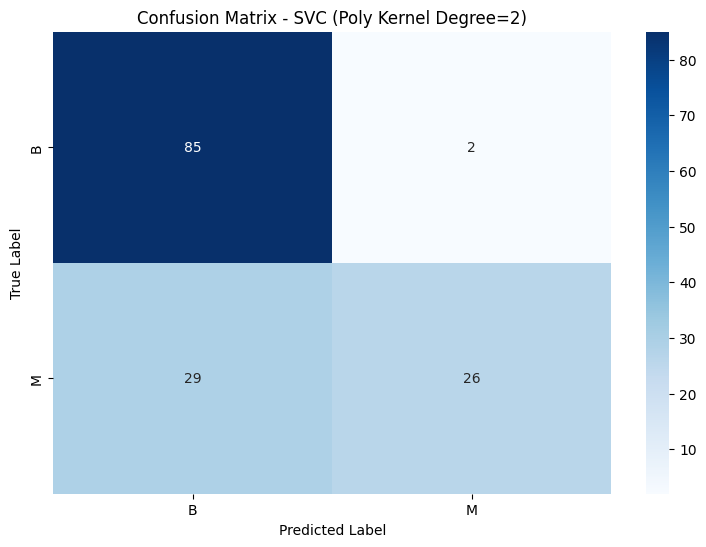

In [12]:
#  Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cm, index=['B', 'M'], columns=['B', 'M']),
            annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix - SVC (Poly Kernel Degree=2)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [13]:
#  Polynomial Regression using SVR (Demo)
# This is just for experimentation and understanding how SVR works.

# Generate synthetic polynomial data
coefs = [15, 1, -1]  # represents polynomial: -x^2 + x + 15

def polynomial(coefs, x):
    return sum([coefs[i]*x**i for i in range(len(coefs))])

X = []
Y = []
x = -5
for i in range(40):
    x += 0.25
    y = polynomial(coefs, x) + random.gauss(0, 2)  # Add noise
    X.append(x)
    Y.append(y)

X = np.array(X).reshape(-1, 1)
Y = np.array(Y)

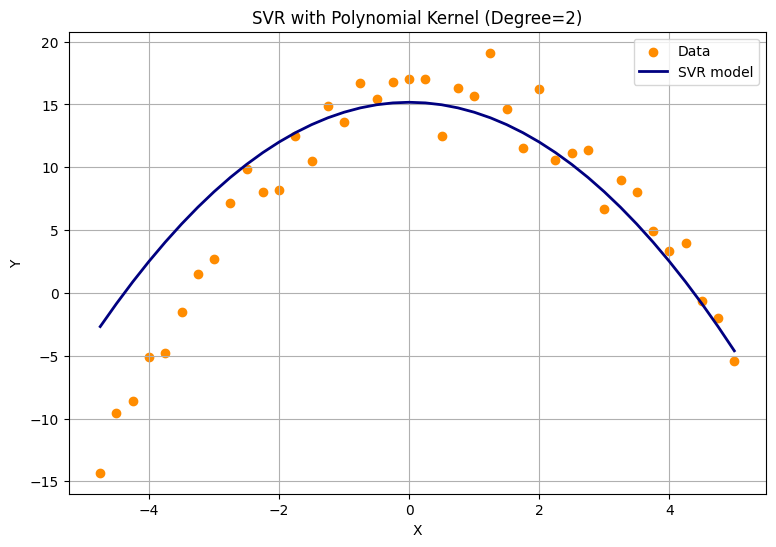

In [14]:
# Train SVR
svr = SVR(kernel='poly', degree=2, C=1.0, epsilon=0.1)
svr.fit(X, Y)

# Plot SVR result
plt.scatter(X, Y, color='darkorange', label='Data')
plt.plot(X, svr.predict(X), color='navy', lw=2, label='SVR model')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("SVR with Polynomial Kernel (Degree=2)")
plt.legend()
plt.grid(True)
plt.show()